# Question: Bank Fraud Model
Let's say that you work at a bank that wants to build a model to detect fraud on the platform.

The bank wants to implement a text messaging service in addition that will text customers when the model detects a fraudulent transaction in order for the customer to approve or deny the transaction with a text response.

How would we build this model?

## What is a fraud detection?

Fraud detection is a set of activities undertaken to prevent money or property from being obtained through false pretenses. 
In banking, fraud may include:
* Credit Card Fraud
* Money Laundering Fraud
* Mortgage Fraud

This means techniques such as real-time monitoring for frauds is **recommended**. 

Organizations should look for fraud in:
* financial transactions
* location
* devices used
* initiated sessions 
* authentication systems

## Fraud detection techniques

Statistical data analysis techniques include the use of:

* Calculating statistical parameters
* Regression analysis
* Probability distributions and models
* Data matching


AI techniques used to detect fraud include the use of:

* Data mining - Which can classify, group and segment data to search through up to millions of transactions to find patterns and detect fraud.
* Neural networks - Which can learn suspicious looking patterns, and use those patterns to detect them further.
* Machine learning - Which can automatically identify characteristics found in fraud.
* Pattern recognition - Which can detect classes, clusters and patterns of suspicious behavior.

### Techniques and Approaches:
I implemented and evaluated the following Machine Learning algorithms:
* Random Forest
* Support Vector Machine
* K-nearest neighbor
* Neural Networks (Feed Forward)

### Model Workflow:
The diagram below depicts a high-level, end-to-end ML modeling workflow we followed. Each pipeline depicts a logical stage with steps in the overall ML modeling life cycle.
1. Training Pipeline stage: This stage deals with data identification and exploration; output of this stage would be dataset for model training
2. Model Creation Pipeline stage: This stage deals with Model training; output of this stage would be a trained model that will be leveraged for Prediction
3. Model Prediction Pipeline stage: This stage is where the trained model would run against the actual dataset, do the prediction, and store the statistics that can be leveraged for reasoning

dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import cufflinks as cf
import plotly
import datetime
import math
import matplotlib
import sklearn
from IPython.display import HTML
#from IPython.display import YouTubeVideo

import pickle
import os

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split

In [13]:
# Setting seabon style
sns.set(style='white', palette='colorblind')

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [4]:
#import dataset
df = pd.read_csv('./data/creditcard.csv', encoding='latin_1')
df.columns = df.columns.str.lower()
print(df.shape)
df.head()

(284807, 31)


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# count unique values of label
print(df['class'].value_counts())
print('\n')
print(df['class'].value_counts(normalize=True))

0    284315
1       492
Name: class, dtype: int64


0    0.998273
1    0.001727
Name: class, dtype: float64


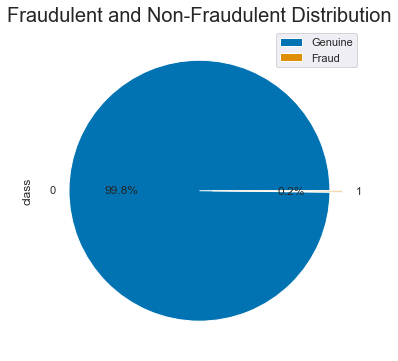

In [6]:
df["class"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%')
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Genuine","Fraud"])
plt.show()

In [7]:
# Dealing with missing data
df.isnull().sum().max()

0

Text(0.5, 1.0, 'Distribution of Fraud Transactions')

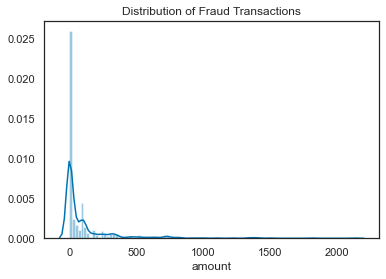

In [14]:
sns.distplot(df[df['class'] == 1]['amount'], bins=100)
plt.title("Distribution of Fraud Transactions")

Text(0.5, 1.0, 'Distribution of Genuine Transactions')

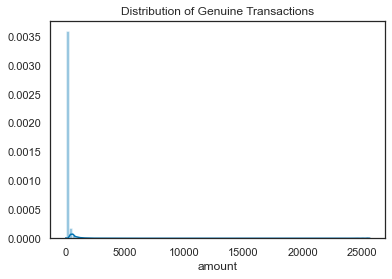

In [15]:
sns.distplot(df[df['class'] == 0]['amount'], bins=100)
plt.title("Distribution of Genuine Transactions")

In [16]:
print("Fraud Transaction distribution : \n",df[(df['class'] == 1)]['amount'].value_counts().head())
print("\n")
print("Maximum amount of fraud transaction - ",df[(df['class'] == 1)]['amount'].max())
print("Minimum amount of fraud transaction - ",df[(df['class'] == 1)]['amount'].min())

Fraud Transaction distribution : 
 1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: amount, dtype: int64


Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.0


### Summary of this part:
- 113 fraud transactions for just one dollar 
- 27 fraud transaction for $99.99

- the higest fraud transaction amount was $2125.87 
- lowest was just 0.00 (need check what that mean)


check this https://docs.multisafepay.com/tools/zero-authorization/what-is-zero-authorization/

In [17]:
print("Genuine Transaction distribution : \n",df[(df['class'] == 0)]['amount'].value_counts().head())
print("\n")
print("Maximum amount of Genuine transaction - ",df[(df['class'] == 0)]['amount'].max())
print("Minimum amount of Genuine transaction - ",df[(df['class'] == 0)]['amount'].min())

Genuine Transaction distribution : 
 1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
Name: amount, dtype: int64


Maximum amount of Genuine transaction -  25691.16
Minimum amount of Genuine transaction -  0.0


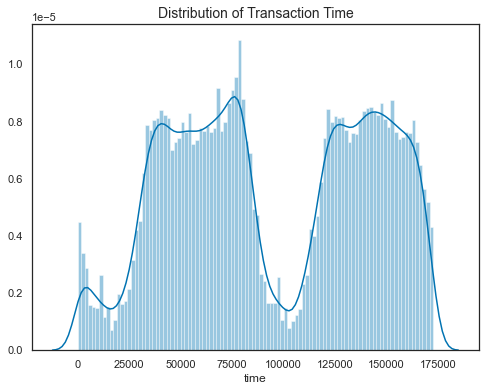

In [18]:
# Let's check time of transaction
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(df['time'], bins=100)
plt.show()

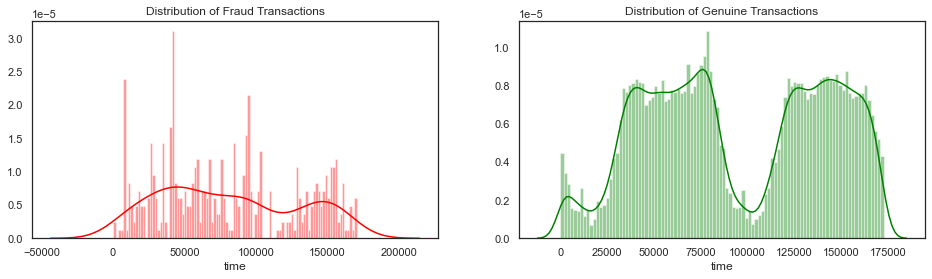

In [19]:
# distribution this transaction by type of transaction
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['class'] == 1)]['time'], bins=100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['class'] == 0)]['time'], bins=100, color='green', ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

In [20]:
df[['time','amount','class']].corr()['class'].sort_values(ascending=False).head(10)

class     1.000000
amount    0.005632
time     -0.012323
Name: class, dtype: float64

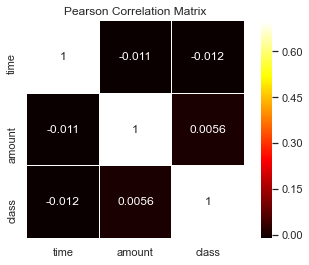

In [22]:
plt.title('Pearson Correlation Matrix')
sns.heatmap(df[['time', 'amount','class']].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="hot",
            linecolor='w',annot=True);

In [23]:
df.reset_index(inplace = True , drop = True)

In [24]:
X = df.drop(['time','class','amount'],axis=1)
y = df['class']

In [25]:
X

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [26]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)

In [27]:
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (199364, 28)
y_train -  (199364,)
X_test -  (85443, 28)
y_test -  (85443,)


In [39]:
# Logistis Regression ==LR
from sklearn.linear_model import LogisticRegression
# evaluation model
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [29]:
LR = LogisticRegression()
LR.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = LR.predict(X_test)

In [32]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.88      0.61      0.72       144

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [34]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.99920
AUC : 0.80549
Precision : 0.88000
Recall : 0.61111
F1 : 0.72131


In [35]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[85287,    12],
       [   56,    88]])

In [38]:
TN = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TP = cnf_matrix[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3))
print('precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

TN:  85287
FP:  12
FN:  56
TP:  88
recall =  0.611
precision =  0.88
F1 =  0.721


f1=0.721


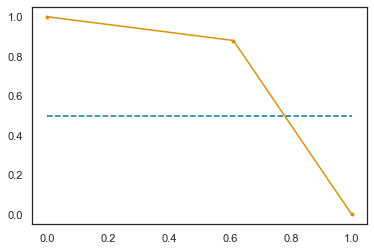

In [40]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)
print('f1=%.3f' % (f1))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()


In [41]:
metrics.roc_auc_score(y_test , y_pred) 

0.8054852147543738

In [43]:
y_pred_proba = LR.predict_proba(X_test)
y_pred_proba

array([[9.99526478e-01, 4.73522496e-04],
       [9.99865039e-01, 1.34960706e-04],
       [9.99793042e-01, 2.06957747e-04],
       ...,
       [9.99663509e-01, 3.36490873e-04],
       [9.99694365e-01, 3.05635087e-04],
       [9.99845362e-01, 1.54638272e-04]])

AUC -  0.8054852147543738 



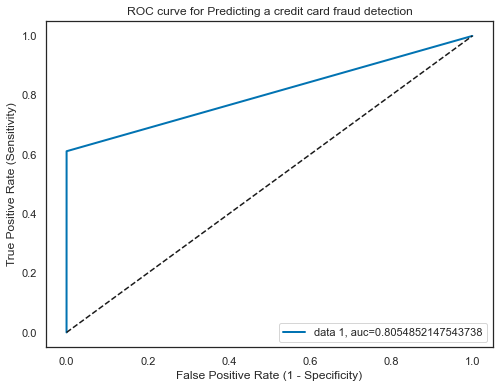

In [44]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [45]:
# Import imbalace technique algorithims
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

Using TensorFlow backend.


In [46]:
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

In [47]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (199364, 28)
y_train -  (199364,)
X_test -  (85443, 28)
y_test -  (85443,)


In [48]:
# Undersampling only on train

print('Original dataset shape %s' % Counter(y_train))
random_state = 42

rus = RandomUnderSampler(random_state=random_state)
X_res, y_res = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

Original dataset shape Counter({0: 199019, 1: 345})
Resampled dataset shape Counter({0: 345, 1: 345})
X_train -  (690, 28)
y_train -  (690,)
X_test -  (85443, 28)
y_test -  (85443,)


In [49]:
# Undersampling with Logistic Regression
LR_rus = LogisticRegression()
LR_rus.fit(X_train, y_train)

y_pred = LR_rus.predict(X_test)

In [53]:
conf_mx = metrics.confusion_matrix(y_test,y_pred)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print('recall = ', round(recall,2))
print('precision = ', round(precision,2))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

TN:  83062
FP:  2234
FN:  13
TP:  134
recall =  0.91
precision =  0.06
F1 =  0.107


In [52]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.97370
AUC : 0.94269
Precision : 0.05659
Recall : 0.91156
F1 : 0.10656


f1=0.107


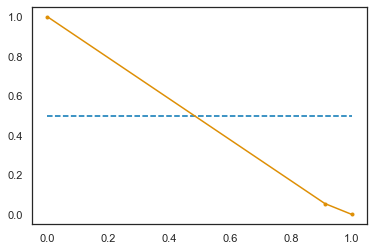

In [54]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)
print('f1=%.3f' % (f1))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

In [55]:
from imblearn.over_sampling import RandomOverSampler

In [56]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (199364, 28)
y_train -  (199364,)
X_test -  (85443, 28)
y_test -  (85443,)
